In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df_all=pd.read_csv('법정동데이터ver2.csv')
df_all.head()

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
0,0,8,0.000000,0,0,70.44,0.0,7853.606094,51,27.666667,908.2,0.539394,121155.06,9522.102855,16882
1,1,0,0.000000,0,0,70.44,0.0,2301.024680,32,9.666667,908.2,0.000000,121155.06,9522.102855,0
2,2,0,0.000000,0,0,70.44,0.0,983.529811,16,1.666667,908.2,0.000000,121155.06,9522.102855,0
3,3,2,0.000000,0,0,70.44,0.0,1838.011626,33,1.000000,908.2,0.000000,121155.06,9522.102855,24012
4,4,1,290.058108,5,0,70.44,0.0,2002.683230,34,0.666667,908.2,0.068966,121155.06,9522.102855,32494


In [3]:
df_all=df_all.assign(
    대중교통 = lambda x: x['버스정류장수'] + x['지하철역수'],
    자전거도로수용율 = lambda x: x['자전거도로길이'] /x['도로길이'],
    인구 = lambda x:x['직장인구'] +x['생활인구']
)
df_use=df_all[['대중교통','자전거도로수용율','평균경사도','인구','추정교통량','안정성지수평균','자전거이용량']]
df_use.fillna(0,inplace=True)

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [4]:
df_use=df_use.query('안정성지수평균 > 0 & 자전거도로수용율 > 0')

In [5]:
df_use

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340
18,16,0.428982,3.333333,9.990734e+05,2506.993103,0.239583,156114
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756
...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388
463,32,0.241067,2.333333,1.291689e+06,69951.000000,0.690722,287342
464,61,0.176436,0.333333,3.045575e+06,40420.000000,0.804035,1236036
465,54,0.147195,2.333333,1.560991e+06,31903.000000,0.708297,719840


In [6]:
df_cl=df_use[['자전거도로수용율','안정성지수평균']]
df_cl.isna().sum()

자전거도로수용율    0
안정성지수평균     0
dtype: int64

### HierarchicalClustering

In [7]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df_use[['자전거도로수용율','안정성지수평균']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [8]:
data_scale

array([[0.14080001, 0.        ],
       [0.13321126, 0.07152589],
       [0.08696716, 0.04189373],
       [0.41783111, 0.06741031],
       [0.07168215, 0.097519  ],
       [0.02781354, 0.05005331],
       [0.00524718, 0.03682156],
       [0.07128125, 0.04126569],
       [0.11718846, 0.12278826],
       [0.1554953 , 0.31548537],
       [0.15561765, 0.0047868 ],
       [0.18937142, 0.1044505 ],
       [0.11871433, 0.13371682],
       [0.0920525 , 0.08659308],
       [0.0023302 , 0.08712176],
       [0.03038841, 0.17029973],
       [0.92663436, 0.54564033],
       [0.63374148, 0.11268165],
       [0.01691207, 0.25722071],
       [0.18897754, 1.        ],
       [0.13844302, 0.52163453],
       [0.11885514, 0.25496302],
       [0.04904519, 0.16089269],
       [0.33463511, 0.1858956 ],
       [0.02338287, 0.23332432],
       [0.49164924, 0.1854957 ],
       [0.10991978, 0.16610848],
       [0.03028434, 0.16025493],
       [0.50086342, 0.11473944],
       [0.82928592, 0.0569527 ],
       [0.

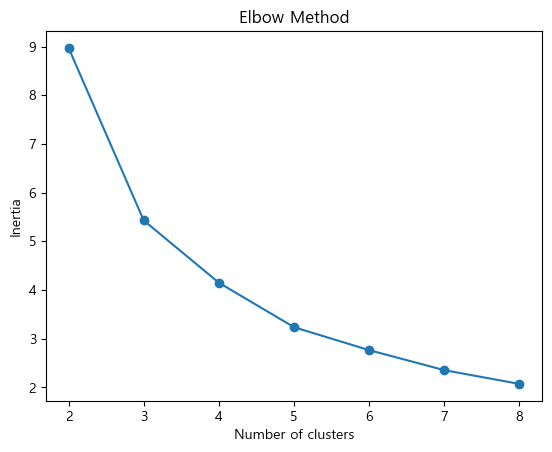

In [9]:
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# 각 클러스터 개수에 대한 KMeans 모델을 훈련하고 관성(inertia)을 저장
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_scale)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

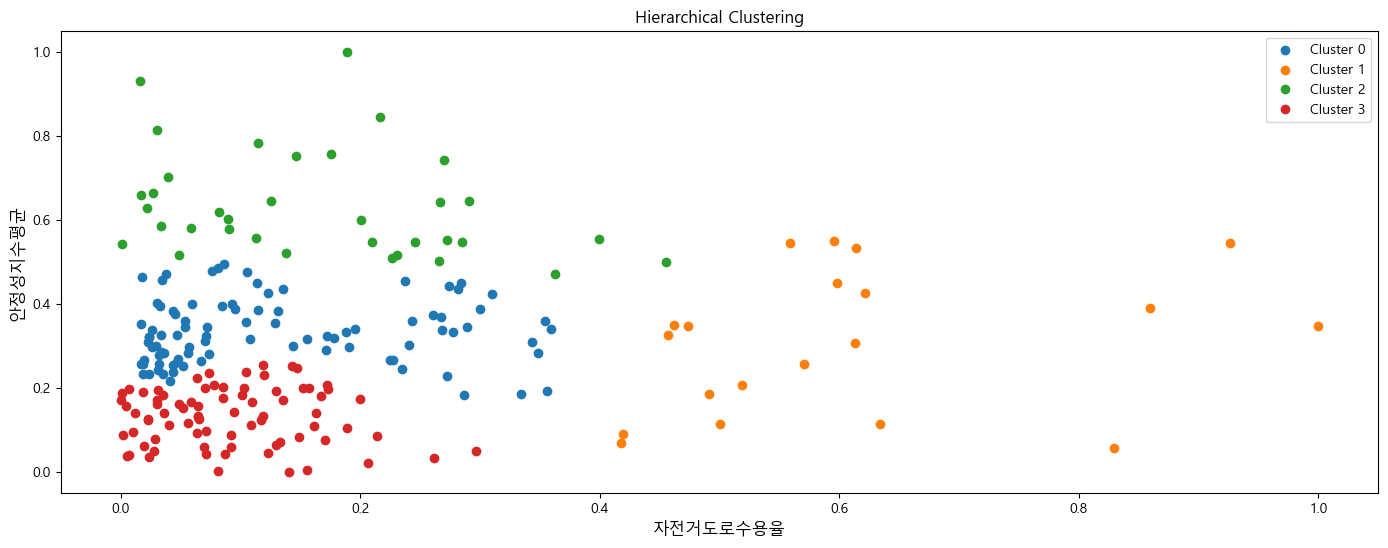

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering 수행
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = cluster.fit_predict(data_scale)

# 클러스터 결과에 따른 산점도 그리기
plt.figure(figsize=(17, 6))

# 각 클러스터별로 데이터 포인트 그리기
for i in range(4):
    plt.scatter(data_scale[cluster_labels == i, 0], data_scale[cluster_labels == i, 1], label=f'Cluster {i}')

plt.title('Hierarchical Clustering')
plt.legend()  # 범례 표시
plt.xlabel('자전거도로수용율', size=12)
plt.ylabel('안정성지수평균', size=12)
plt.show()


In [13]:
df_use['cluster'] = cluster_labels
df_use.to_csv("hierarchical.csv",index=False,encoding='utf-8')

In [14]:
df_use_1 = df_use.groupby('cluster')[['대중교통','자전거도로수용율', '평균경사도', '인구', '추정교통량', '안정성지수평균', '자전거이용량']].mean()
df_use_1 = pd.DataFrame(df_use_1)


In [15]:
df_use_1

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량
cluster,,,,,,,
0,49.422222,0.132209,4.848148,2.932358e+06,26328.868148,0.911463,393880.955556
1,30.150000,0.624224,4.866667,3.220876e+06,22198.623822,0.854570,381991.700000
2,39.685714,0.169293,4.380952,1.513554e+06,21347.390000,1.670788,325369.828571
3,42.730769,0.094454,6.290598,1.460423e+06,23447.176216,0.402549,310293.743590


In [17]:
2.93e06

2930000.0

In [18]:
df_clu = df_use[df_use['cluster']==3]
df_clu

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,3
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,3
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,3
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,3
47,6,0.028946,4.666667,3.106880e+05,2051.000000,0.195652,0,3
...,...,...,...,...,...,...,...,...
429,12,0.080316,11.333333,5.166578e+05,6232.000000,0.591195,28500,3
430,24,0.097715,11.333333,5.166578e+05,6232.000000,0.426901,70782,3
433,26,0.151256,7.666667,7.349985e+06,25997.000000,0.693122,88864,3
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,3


In [19]:
location = pd.read_csv('서울시_법정동별_서울전체도로.csv', encoding='cp949')
location

,field_1,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,SeoulRoadLength,SeoulRoadCount
0,0,11110101,Cheongun-dong,청운동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,7853.606094,51
1,1,11110102,Singyo-dong,신교동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,2301.024680,32
2,2,11110103,Gungjeong-dong,궁정동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,983.529811,16
3,3,11110104,Hyoja-dong,효자동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,1838.011626,33
4,4,11110105,Changseong-dong,창성동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,2002.683230,34
...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,11740106,Dunchon-dong,둔촌동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,24467.166394,139
463,463,11740107,Amsa-dong,암사동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,51934.430103,294
464,464,11740108,Seongnae-dong,성내동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,55904.105084,427
465,465,11740109,Cheonho-dong,천호동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,72835.676449,544


In [20]:
loc = location[['field_1', 'EMD_KOR_NM']]
loc

,field_1,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [21]:
df_clu

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,3
5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,3
6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,3
31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,3
47,6,0.028946,4.666667,3.106880e+05,2051.000000,0.195652,0,3
...,...,...,...,...,...,...,...,...
429,12,0.080316,11.333333,5.166578e+05,6232.000000,0.591195,28500,3
430,24,0.097715,11.333333,5.166578e+05,6232.000000,0.426901,70782,3
433,26,0.151256,7.666667,7.349985e+06,25997.000000,0.693122,88864,3
462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,3


In [22]:
df_use.reset_index(inplace=True)


In [23]:
df_clu = df_use[df_use['cluster']==3]
df_clu

,index,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,4,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,3
1,5,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,3
2,6,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,3
4,31,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,3
5,47,6,0.028946,4.666667,3.106880e+05,2051.000000,0.195652,0,3
...,...,...,...,...,...,...,...,...,...
185,429,12,0.080316,11.333333,5.166578e+05,6232.000000,0.591195,28500,3
186,430,24,0.097715,11.333333,5.166578e+05,6232.000000,0.426901,70782,3
189,433,26,0.151256,7.666667,7.349985e+06,25997.000000,0.693122,88864,3
218,462,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,3


In [24]:
loc

,field_1,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [25]:
loc.rename(columns={'field_1' : 'index'}, inplace = True)
loc

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [26]:
merged = pd.merge(loc, df_clu, on='index', how='inner')
merged

,index,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,4,창성동,1,0.144835,0.666667,1.306772e+05,908.200000,0.068966,32494,3
1,5,통의동,2,0.137051,1.000000,4.436715e+05,1117.000000,0.250000,0,3
2,6,적선동,1,0.089619,1.000000,4.436715e+05,1117.000000,0.175000,58340,3
3,31,운니동,5,0.073941,0.666667,4.247247e+05,481.793103,0.315789,36756,3
4,47,계동,6,0.028946,4.666667,3.106880e+05,2051.000000,0.195652,0,3
...,...,...,...,...,...,...,...,...,...,...
73,429,염곡동,12,0.080316,11.333333,5.166578e+05,6232.000000,0.591195,28500,3
74,430,신원동,24,0.097715,11.333333,5.166578e+05,6232.000000,0.426901,70782,3
75,433,청담동,26,0.151256,7.666667,7.349985e+06,25997.000000,0.693122,88864,3
76,462,둔촌동,41,0.177626,5.000000,9.281510e+05,45593.000000,0.592944,295388,3


In [27]:
merged['EMD_KOR_NM'].tolist()

['창성동',
 '통의동',
 '적선동',
 '운니동',
 '계동',
 '이화동',
 '동숭동',
 '혜화동',
 '명륜4가',
 '장충동2가',
 '쌍림동',
 '을지로5가',
 '오장동',
 '용산동2가',
 '문배동',
 '한강로1가',
 '한남동',
 '동빙고동',
 '보광동',
 '중곡동',
 '구의동',
 '자양동',
 '화양동',
 '군자동',
 '용두동',
 '장안동',
 '청량리동',
 '휘경동',
 '이문동',
 '면목동',
 '상봉동',
 '중화동',
 '묵동',
 '신내동',
 '성북동',
 '성북동1가',
 '삼선동1가',
 '안암동2가',
 '안암동5가',
 '보문동1가',
 '종암동',
 '하월곡동',
 '상월곡동',
 '석관동',
 '쌍문동',
 '방학동',
 '창동',
 '도봉동',
 '월계동',
 '공릉동',
 '하계동',
 '상계동',
 '중계동',
 '수색동',
 '갈현동',
 '응암동',
 '역촌동',
 '신사동',
 '진관동',
 '연희동',
 '북가좌동',
 '창전동',
 '동교동',
 '망원동',
 '개화동',
 '당산동2가',
 '본동',
 '봉천동',
 '남현동',
 '방배동',
 '원지동',
 '잠원동',
 '반포동',
 '염곡동',
 '신원동',
 '청담동',
 '둔촌동',
 '천호동']